In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import ellipe

In [2]:
class Planet:
    def __init__(self,name,mass,R1,R2,velocity,t0=0):
        """
        Class to hold all of the parameters of a planet
        mass = units of kg
        R1 is major axis (a) of orbit, R2 is minor axis (b)
        R1,R2 = units of m
        #Speed the planet goes through orbit
        velocity = units of m/s
        
        Instead of specifying initial planetary position, specify how long it is into its orbit in
        t0 = units of earth years
        """
        #Initialize parameters
        self.mass = mass
        self.t0 = t0
        self.R1 = R1
        self.R2 = R2
        self.velocity = velocity
        self.name = name
        #Calculate circumference of ellipse:
        #calculate the circumference of the ellipse using scipy special ellipse integral
        eccentricity_squared = 1-(R2**2)/(R1**2)
        Circumference = 4*R1*ellipe(eccentricity_squared)
        #calculate angular velocity given circumference of orbit, velocity:
        # print(Circumference)
        #(m/s)/m = /s, /s *2*pi = radians/s = ω, angular frequency/velocity
        #So we need 2π*velocity/circumference
        self.omega = 2*np.pi*velocity/Circumference #omega is in units of radians/second

    def position(self,t):
        """
        Even though our units are specified in seconds, we probably want t here to be years
        t = time, units of years, subject to change
        """
        t_new = t + self.t0#add in current + initial time
        t_new = 31536000*t_new#convert from years to seconds
        return np.array([self.R1*np.cos(self.omega*t_new),self.R2*np.sin(self.omega*t_new)])
    def plot_orbit(self,t0,t1):
        t_span = np.linspace(t0,t1,250)
        positions = self.position(t_span)
        plt.plot(positions[0,:],positions[1,:],label = self.name)
        plt.xlabel("x position (m)")
        plt.ylabel("y position (m)")
        plt.legend()

Example: \
Earth \
Mass: 5.9722×1024 kg \
Min dist from sun: 147.1 million km = 147.1e9 m
Max dist from sun: 152.1 million km \
Orbital velocity: 29.78 km/s \
\
Mars: \
Mass: 6.39e23 kg \
Min dist from sun: 207 million km = 207e9 m \
Max dist from sun: 249 million km \
Orbital velocity: 24 km/s 

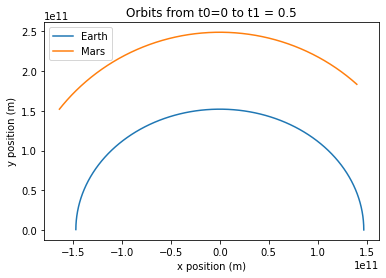

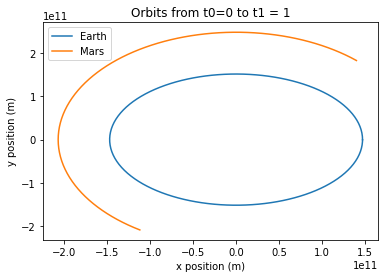

Earth's position at t=.5 years: [-1.47099352e+11  4.51422147e+08] m


In [3]:
Earth = Planet(name='Earth',mass=5.9722e24,R1=147.1e9,R2=152.1e9,velocity = 29.78e3,t0=0)
Mars = Planet(name='Mars',mass=6.39e23,R1=207e9,R2=249e9,velocity = 24e3,t0=.25)
Earth.plot_orbit(0,.5)
Mars.plot_orbit(0,.5)
plt.title(f"Orbits from t0={0} to t1 = {.5}")
plt.show()
Earth.plot_orbit(0,1)
Mars.plot_orbit(0,1)
plt.title(f"Orbits from t0={0} to t1 = {1}")
plt.show()
print(f"Earth's position at t=.5 years: {Earth.position(.5)} m")